In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")

In [3]:
os.makedirs(file_path, exist_ok = True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)

('data/covid/WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x7fca1c750e50>)

In [4]:
# Read in data from url as dataframe
df = pd.read_csv(csv_path)
# Look at first 3 columns 
print(df.head(3))
# Print the data columns to spot any irregularities
print("\n", "The data columns are: ", df.columns)

  Date_reported  Country_code      Country  WHO_region   New_cases  \
0    2020-02-24            AF  Afghanistan        EMRO           5   
1    2020-02-25            AF  Afghanistan        EMRO           0   
2    2020-02-26            AF  Afghanistan        EMRO           0   

    Cumulative_cases   New_deaths   Cumulative_deaths  
0                  5            0                   0  
1                  5            0                   0  
2                  5            0                   0  

 The data columns are:  Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')


In [5]:
# Strip blank spaces in column names
df.columns = [col.strip() for col in df.columns]
display(df.columns)

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [6]:
# Print the country codes
print(df['Country_code'].unique())

['AF' 'AL' 'DZ' 'AD' 'AO' 'AI' 'AG' 'AR' 'AM' 'AW' 'AU' 'AT' 'AZ' 'BS'
 'BH' 'BD' 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BM' 'BT' 'BO' 'BQ' 'BA' 'BW' 'BR'
 'VG' 'BN' 'BG' 'BF' 'BI' 'CV' 'KH' 'CM' 'CA' 'KY' 'CF' 'TD' 'CL' 'CN'
 'CO' 'KM' 'CG' 'CR' 'CI' 'HR' 'CU' 'CW' 'CY' 'CZ' 'CD' 'DK' 'DJ' 'DM'
 'DO' 'EC' 'EG' 'SV' 'GQ' 'ER' 'EE' 'SZ' 'ET' 'FK' 'FO' 'FJ' 'FI' 'FR'
 'GF' 'PF' 'GA' 'GM' 'GE' 'DE' 'GH' 'GI' 'GR' 'GL' 'GD' 'GP' 'GU' 'GT'
 'GG' 'GN' 'GW' 'GY' 'HT' 'VA' 'HN' 'HU' 'IS' 'IN' 'ID' 'IR' 'IQ' 'IE'
 'IM' 'IL' 'IT' 'JM' 'JP' 'JE' 'JO' 'KZ' 'KE' 'XK' 'KW' 'KG' 'LA' 'LV'
 'LB' 'LS' 'LR' 'LY' 'LI' 'LT' 'LU' 'MG' 'MW' 'MY' 'MV' 'ML' 'MT' 'MQ'
 'MR' 'MU' 'YT' 'MX' 'MC' 'MN' 'ME' 'MS' 'MA' 'MZ' 'MM' nan 'NP' 'NL' 'NC'
 'NZ' 'NI' 'NE' 'NG' 'MK' 'MP' 'NO' 'PS' 'OM' ' ' 'PK' 'PA' 'PG' 'PY' 'PE'
 'PH' 'PL' 'PT' 'PR' 'QA' 'KR' 'MD' 'RE' 'RO' 'RU' 'RW' 'BL' 'KN' 'LC'
 'MF' 'PM' 'VC' 'SM' 'ST' 'SA' 'SN' 'RS' 'SC' 'SL' 'SG' 'SX' 'SK' 'SI'
 'SO' 'ZA' 'SS' 'ES' 'LK' 'SD' 'SR' 'SE' 'CH' 'SY' 'TJ' 'TH' 'GB' 'TL

In [7]:
# Check for US only data
display(df[df.Country_code == 'US'])
display(df[df.Country_code == 'US'].shape)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
38000,2020-01-20,US,United States of America,AMRO,5,5,0,0
38001,2020-01-21,US,United States of America,AMRO,0,5,0,0
38002,2020-01-22,US,United States of America,AMRO,0,5,0,0
38003,2020-01-23,US,United States of America,AMRO,0,5,0,0
38004,2020-01-24,US,United States of America,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
38225,2020-09-01,US,United States of America,AMRO,37068,5936572,473,182162
38226,2020-09-02,US,United States of America,AMRO,31808,5968380,423,182585
38227,2020-09-03,US,United States of America,AMRO,42662,6011042,1025,183610
38228,2020-09-04,US,United States of America,AMRO,39402,6050444,1004,184614


(230, 8)

In [8]:
# Another way to check for US only data
df.query('Country_code =="US"')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
38000,2020-01-20,US,United States of America,AMRO,5,5,0,0
38001,2020-01-21,US,United States of America,AMRO,0,5,0,0
38002,2020-01-22,US,United States of America,AMRO,0,5,0,0
38003,2020-01-23,US,United States of America,AMRO,0,5,0,0
38004,2020-01-24,US,United States of America,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
38225,2020-09-01,US,United States of America,AMRO,37068,5936572,473,182162
38226,2020-09-02,US,United States of America,AMRO,31808,5968380,423,182585
38227,2020-09-03,US,United States of America,AMRO,42662,6011042,1025,183610
38228,2020-09-04,US,United States of America,AMRO,39402,6050444,1004,184614


In [9]:
# Drop non-US data and check it worked
df = df[df.Country_code == 'US']
df.drop(df.index)
print("The country code(s) left are: ", df['Country_code'].unique())

The country code(s) left are:  ['US']


In [10]:
# View columns again to determine data we don't need
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [11]:
# Drop unnecessary columns and check it worked
df.drop('Country_code', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.drop('WHO_region', axis=1, inplace=True)
df.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
38000,2020-01-20,5,5,0,0
38001,2020-01-21,0,5,0,0
38002,2020-01-22,0,5,0,0
38003,2020-01-23,0,5,0,0
38004,2020-01-24,1,6,0,0


In [12]:
# Understand data
display(df.index)
display(df.shape)
display(df.columns)
display(df.dtypes)

Int64Index([38000, 38001, 38002, 38003, 38004, 38005, 38006, 38007, 38008,
            38009,
            ...
            38220, 38221, 38222, 38223, 38224, 38225, 38226, 38227, 38228,
            38229],
           dtype='int64', length=230)

(230, 5)

Index(['Date_reported', 'New_cases', 'Cumulative_cases', 'New_deaths',
       'Cumulative_deaths'],
      dtype='object')

Date_reported        object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [13]:
# Info related to data
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 38000 to 38229
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      230 non-null    object
 1   New_cases          230 non-null    int64 
 2   Cumulative_cases   230 non-null    int64 
 3   New_deaths         230 non-null    int64 
 4   Cumulative_deaths  230 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 20.8+ KB


None

In [14]:
# Statistical data
display(df.describe())

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,230.000000,2.300000e+02,230.000000,230.000000
mean,26500.030435,1.840736e+06,807.334783,74944.656522
std,21360.152319,1.911353e+06,832.263529,65313.975325
min,0.000000,5.000000e+00,-514.000000,0.000000
25%,263.500000,4.427750e+03,5.000000,68.500000
50%,25718.000000,1.350810e+06,725.500000,81407.000000
75%,42264.750000,3.022168e+06,1163.250000,131636.250000
max,74354.000000,6.095007e+06,6409.000000,185687.000000


In [15]:
# Check for missing values
display(df.isnull().sum())

Date_reported        0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

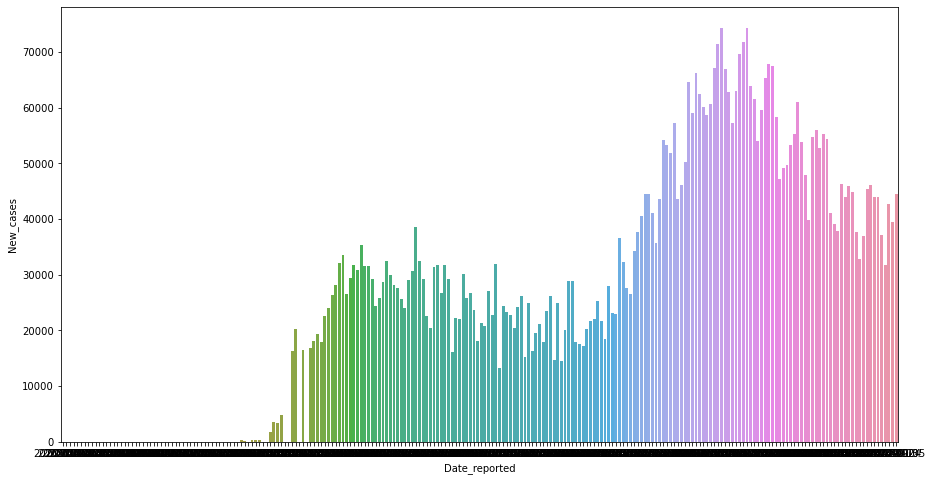

In [16]:
# Plot new cases reported by date to view distribution
plt.figure(figsize=(15,8))
sns.barplot(x='Date_reported', y= 'New_cases', data= df)

In [17]:
# Check for new deaths greater than 1000
df.loc[df.New_deaths > 1000, ['Date_reported', 'New_deaths']]

,Date_reported,New_deaths
38075,2020-04-04,1061
38076,2020-04-05,1166
38077,2020-04-06,1338
38078,2020-04-07,1201
38079,2020-04-08,1286
...,...,...
38221,2020-08-28,1229
38222,2020-08-29,1155
38227,2020-09-03,1025
38228,2020-09-04,1004


In [18]:
# Check for maximum and minumum number of new cases in the US
print("Maximum number of new cases in the US: ")
display(df.New_cases.max())
print("Minimum number of new cases in the US: ")
display(df.New_cases.min())

Maximum number of new cases in the US: 


74354

Minimum number of new cases in the US: 


0

In [19]:
# Check that the sum of new cases is equal to the number of cumulative cases in the US
print("The sum of new cases is: ", df.New_cases.sum())
print("The number of cummulative cases is: ", df.Cumulative_cases.max())
if df.New_cases.sum() == df.Cumulative_cases.max():
    print("The sum of new cases is equal to the number of cumulative cases.")

The sum of new cases is:  6095007
The number of cummulative cases is:  6095007
The sum of new cases is equal to the number of cumulative cases.


In [20]:
# Check location of max deaths
df.New_deaths.idxmax()

38088

In [21]:
# Get more info on when max death occurred
df.loc[df.New_deaths.idxmax(),['Date_reported', 'New_deaths', 'Cumulative_deaths']]

Date_reported        2020-04-17
New_deaths                 6409
Cumulative_deaths         32280
Name: 38088, dtype: object

In [22]:
# Check for errors in data where new deaths is less than zero
df[df.New_deaths <0]

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
38106,2020-05-05,29266,1154985,-514,67279


In [23]:
# One value under zero for new_deaths
# Check for surrounding data near invalid new_deaths value
df.loc[38081:38131]

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
38081,2020-04-10,30859,425889,1925,14665
38082,2020-04-11,35386,461275,1931,16596
38083,2020-04-12,31606,492881,1920,18516
38084,2020-04-13,31633,524514,1928,20444
38085,2020-04-14,29308,553822,1528,21972
38086,2020-04-15,24446,578268,1504,23476
38087,2020-04-16,25802,604070,2395,25871
38088,2020-04-17,28711,632781,6409,32280
38089,2020-04-18,32549,665330,2018,34298
38090,2020-04-19,30023,695353,2438,36736


In [24]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,230.000000,2.300000e+02,230.000000,230.000000
mean,26500.030435,1.840736e+06,807.334783,74944.656522
std,21360.152319,1.911353e+06,832.263529,65313.975325
min,0.000000,5.000000e+00,-514.000000,0.000000
25%,263.500000,4.427750e+03,5.000000,68.500000
50%,25718.000000,1.350810e+06,725.500000,81407.000000
75%,42264.750000,3.022168e+06,1163.250000,131636.250000
max,74354.000000,6.095007e+06,6409.000000,185687.000000


In [25]:
# Create new column with data on percentage of new cases
df['pct_cases'] = (df['New_cases']/ df['Cumulative_cases']) * 100
df

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,pct_cases
38000,2020-01-20,5,5,0,0,100.000000
38001,2020-01-21,0,5,0,0,0.000000
38002,2020-01-22,0,5,0,0,0.000000
38003,2020-01-23,0,5,0,0,0.000000
38004,2020-01-24,1,6,0,0,16.666667
...,...,...,...,...,...,...
38225,2020-09-01,37068,5936572,473,182162,0.624401
38226,2020-09-02,31808,5968380,423,182585,0.532942
38227,2020-09-03,42662,6011042,1025,183610,0.709727
38228,2020-09-04,39402,6050444,1004,184614,0.651225
